# Notebook 04: Model Evaluation and Insights

In [26]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, \
                            recall_score, f1_score, plot_roc_curve, roc_auc_score, average_precision_score, \
                            precision_recall_curve, ConfusionMatrixDisplay, plot_precision_recall_curve

from pycaret.classification import *
from pycaret.classification import load_config
load_config('../datasets/my_config') # load the configuration from the setup pycaret

In [2]:
# load the best_model
filename = '../datasets/best_model'
best_model = load_model(filename)

Transformation Pipeline and Model Successfully Loaded


In [3]:
# load the test_encoded file
test_encoded = pd.read_pickle('../datasets/test_encoded.pkl')

In [4]:
# check the shape and first 2 rows of test_encoded
print(test_encoded.shape)
test_encoded.head(2)

(555719, 291)


,amt,is_male,is_fraud,age,distance,pre_amt,cum_sum,amt_diff,pct_change,amt_avg,diff_minutes_pre_trans,diff_distance,trans_last_5T,trans_last_1h,trans_last_24h,trans_last_7d,trans_last_30d,avg_last_5T,avg_last_1h,avg_last_24h,avg_last_7d,avg_last_30d,min_last_24h,min_last_7d,min_last_30d,max_last_24h,max_last_7d,max_last_30d,merch_last_24h,merch_last_7d,merch_last_14d,merch_last_30d,avg_merch_last_24h,avg_merch_last_7d,avg_merch_last_14d,avg_merch_last_30d,min_merch_last_24h,min_merch_last_7d,min_merch_last_14d,min_merch_last_30d,max_merch_last_24h,max_merch_last_7d,max_merch_last_14d,max_merch_last_30d,internet_transaction,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,trans_month_7,trans_month_8,trans_month_9,trans_month_10,trans_month_11,trans_month_12,trans_week_26,trans_week_27,trans_week_28,trans_week_29,trans_week_30,trans_week_31,trans_week_32,trans_week_33,trans_week_34,trans_week_35,trans_week_36,trans_week_37,trans_week_38,trans_week_39,trans_week_40,trans_week_41,trans_week_42,trans_week_43,trans_week_44,trans_week_45,trans_week_46,trans_week_47,trans_week_48,trans_week_49,trans_week_50,trans_week_51,trans_week_52,trans_week_53,trans_day_2,trans_day_3,trans_day_4,trans_day_5,trans_day_6,trans_day_7,trans_day_8,trans_day_9,trans_day_10,trans_day_11,trans_day_12,trans_day_13,trans_day_14,trans_day_15,trans_day_16,trans_day_17,trans_day_18,trans_day_19,trans_day_20,trans_day_21,trans_day_22,trans_day_23,trans_day_24,trans_day_25,trans_day_26,trans_day_27,trans_day_28,trans_day_29,trans_day_30,trans_day_31,trans_hour_1,trans_hour_2,trans_hour_3,trans_hour_4,trans_hour_5,trans_hour_6,trans_hour_7,trans_hour_8,trans_hour_9,trans_hour_10,trans_hour_11,trans_hour_12,trans_hour_13,trans_hour_14,trans_hour_15,trans_hour_16,trans_hour_17,trans_hour_18,trans_hour_19,trans_hour_20,trans_hour_21,trans_hour_22,trans_hour_23,trans_dayofweek_1,trans_dayofweek_2,trans_dayofweek_3,trans_dayofweek_4,trans_dayofweek_5,trans_dayofweek_6,amt_group_high,amt_group_low,amt_group_medium,amt_group_very_high,amt_group_very_low,age_group_23_33,age_group_33_43,age_group_43_53,age_group_53_63,age_group_63_73,age_group_73_83,age_group_83_93,age_group_above_93,customer_segment_Lost_Cust,customer_segment_Low_Value_Cust,customer_segment_Medium_Value_Cust,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cluster_18,cluster_19,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25,cluster_26,cluster_27,cluster_28,cluster_29,cluster_30,cluster_31,cluster_32,cluster_33,cluster_34,cluster_35,cluster_36,cluster_37,cluster_38,cluster_39,cluster_40,cluster_41,cluster_42,cluster_43,state_DE,trans_month_2,trans_month_3,trans_month_4,trans_month_5,trans_month_6,trans_week_2,trans_week_3,trans_week_4,trans_week_5,trans_week_6,trans_week_7,trans_week_8,trans_week_9,trans_week_10,trans_week_11,trans_week_12,trans_week_13,trans_week_14,trans_week_15,trans_week_16,trans_week_17,trans_week_18,trans_week_19,trans_week_20,trans_week_21,trans_week_22,trans_week_23,trans_week_24,trans_week_25,amt_group_above_medium,customer_segment_Top_Cust
0,124.66,0,0,34,30.533617,0.00,124.66,0.00,0.000000,124.66,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,124.66,124.66,124.66,124.66,124.66,124.66,124.66,124.66,124.66

In [5]:
# check on the tuned model's metrics
# data = none (default), predict label and score on the holdout set (validation datasets)
predict_model(best_model) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9994,0.9997,0.9361,0.9654,0.9505,0.9502,0.9503


,amt,is_male,age,distance,pre_amt,cum_sum,amt_diff,pct_change,amt_avg,diff_minutes_pre_trans,diff_distance,trans_last_5T,trans_last_1h,trans_last_24h,trans_last_7d,trans_last_30d,avg_last_5T,avg_last_1h,avg_last_24h,avg_last_7d,avg_last_30d,min_last_24h,min_last_7d,min_last_30d,max_last_24h,max_last_7d,max_last_30d,merch_last_24h,merch_last_7d,merch_last_14d,merch_last_30d,avg_merch_last_24h,avg_merch_last_7d,avg_merch_last_14d,avg_merch_last_30d,min_merch_last_24h,min_merch_last_7d,min_merch_last_14d,min_merch_last_30d,max_merch_last_24h,max_merch_last_7d,max_merch_last_14d,max_merch_last_30d,internet_transaction,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,trans_month_2,trans_month_3,trans_month_4,trans_month_5,trans_month_6,trans_month_7,trans_month_8,trans_month_9,trans_month_10,trans_month_11,trans_month_12,trans_week_2,trans_week_3,trans_week_4,trans_week_5,trans_week_6,trans_week_7,trans_week_8,trans_week_9,trans_week_10,trans_week_11,trans_week_12,trans_week_13,trans_week_14,trans_week_15,trans_week_16,trans_week_17,trans_week_18,trans_week_19,trans_week_20,trans_week_21,trans_week_22,trans_week_23,trans_week_24,trans_week_25,trans_week_26,trans_week_27,trans_week_28,trans_week_29,trans_week_30,trans_week_31,trans_week_32,trans_week_33,trans_week_34,trans_week_35,trans_week_36,trans_week_37,trans_week_38,trans_week_39,trans_week_40,trans_week_41,trans_week_42,trans_week_43,trans_week_44,trans_week_45,trans_week_46,trans_week_47,trans_week_48,trans_week_49,trans_week_50,trans_week_51,trans_week_52,trans_day_2,trans_day_3,trans_day_4,trans_day_5,trans_day_6,trans_day_7,trans_day_8,trans_day_9,trans_day_10,trans_day_11,trans_day_12,trans_day_13,trans_day_14,trans_day_15,trans_day_16,trans_day_17,trans_day_18,trans_day_19,trans_day_20,trans_day_21,trans_day_22,trans_day_23,trans_day_24,trans_day_25,trans_day_26,trans_day_27,trans_day_28,trans_day_29,trans_day_30,trans_day_31,trans_hour_1,trans_hour_2,trans_hour_3,trans_hour_4,trans_hour_5,trans_hour_6,trans_hour_7,trans_hour_8,trans_hour_9,trans_hour_10,trans_hour_11,trans_hour_12,trans_hour_13,trans_hour_14,trans_hour_15,trans_hour_16,trans_hour_17,trans_hour_18,trans_hour_19,trans_hour_20,trans_hour_21,trans_hour_22,trans_hour_23,trans_dayofweek_1,trans_dayofweek_2,trans_dayofweek_3,trans_dayofweek_4,trans_dayofweek_5,trans_dayofweek_6,amt_group_low,amt_group_medium,amt_group_above_medium,amt_group_high,amt_group_very_high,age_group_23_33,age_group_33_43,age_group_43_53,age_group_53_63,age_group_63_73,age_group_73_83,age_group_83_93,age_group_above_93,customer_segment_Lost_Cust,customer_segment_Low_Value_Cust,customer_segment_Medium_Value_Cust,customer_segment_Top_Cust,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cluster_18,cluster_19,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25,cluster_26,cluster_27,cluster_28,cluster_29,cluster_30,cluster_31,cluster_32,cluster_33,cluster_34,cluster_35,cluster_36,cluster_37,cluster_38,cluster_39,cluster_40,cluster_41,cluster_42,cluster_43,trans_week_53,amt_group_very_low,is_fraud,Label,Score
0,51.189999,0,65,78.064827,119.080002,4631.080078,-67.889999,-0.570121,53.230804,527.150024,88.290123,1.0,1.0,5.0,21.0,79.0,51.189999,51.18999

In [6]:
# Returns the last printed scoring grid.
train_result = pull()
train_result

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9994,0.9997,0.9361,0.9654,0.9505,0.9502,0.9503


In [7]:
# split the test_encoded into test_eval and y_true
test_eval = test_encoded.drop('is_fraud', axis=1)
y_true = test_encoded['is_fraud']

In [8]:
# used the tuned model for prediction
predicted_prob = predict_model(best_model, 
                               test_eval,
                               raw_score = True)

In [9]:
# predict y_pred
y_pred = predicted_prob['Label']

In [10]:
# check the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(553415, 159, 199, 1946)

In [18]:
# create array
cf_matrix = np.array([[tn, fp],[fn,tp]])
cf_matrix

array([[553415,    159],
       [   199,   1946]], dtype=int64)

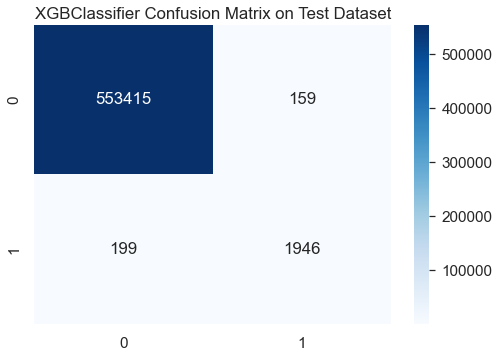

In [28]:
# plot confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='')
plt.title('XGBClassifier Confusion Matrix on Test Dataset');

In [29]:
# evaluate tuned model on the test datasets
print(f"accuracy score: {accuracy_score(y_true, y_pred)}")
print(f"recall score: {recall_score(y_true, y_pred)}")
print(f"f1 score: {f1_score(y_true, y_pred)}")
print(f"precision score: {precision_score(y_true, y_pred)}")
print(f"average precision score: {average_precision_score(y_true, y_pred)}")
print(f"roc auc score: {roc_auc_score(y_true, y_pred)}")

accuracy score: 0.9993557895267212
recall score: 0.9072261072261072
f1 score: 0.9157647058823529
precision score: 0.9244655581947744
average precision score: 0.8390573842742098
roc auc score: 0.9534694413769298


Although the overall metrics score drop a little bit as compared to the metrics on validation dataset, the overall metrics are good and decent with above 90%. It will be able to generalize the future data and I will suggest to proceed and deploy the model for credit card fraud detection.

## Dashboard Preparation

In [30]:
print(predicted_prob.shape)
predicted_prob.head(2)

(555719, 293)


,amt,is_male,age,distance,pre_amt,cum_sum,amt_diff,pct_change,amt_avg,diff_minutes_pre_trans,diff_distance,trans_last_5T,trans_last_1h,trans_last_24h,trans_last_7d,trans_last_30d,avg_last_5T,avg_last_1h,avg_last_24h,avg_last_7d,avg_last_30d,min_last_24h,min_last_7d,min_last_30d,max_last_24h,max_last_7d,max_last_30d,merch_last_24h,merch_last_7d,merch_last_14d,merch_last_30d,avg_merch_last_24h,avg_merch_last_7d,avg_merch_last_14d,avg_merch_last_30d,min_merch_last_24h,min_merch_last_7d,min_merch_last_14d,min_merch_last_30d,max_merch_last_24h,max_merch_last_7d,max_merch_last_14d,max_merch_last_30d,internet_transaction,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,trans_month_7,trans_month_8,trans_month_9,trans_month_10,trans_month_11,trans_month_12,trans_week_26,trans_week_27,trans_week_28,trans_week_29,trans_week_30,trans_week_31,trans_week_32,trans_week_33,trans_week_34,trans_week_35,trans_week_36,trans_week_37,trans_week_38,trans_week_39,trans_week_40,trans_week_41,trans_week_42,trans_week_43,trans_week_44,trans_week_45,trans_week_46,trans_week_47,trans_week_48,trans_week_49,trans_week_50,trans_week_51,trans_week_52,trans_week_53,trans_day_2,trans_day_3,trans_day_4,trans_day_5,trans_day_6,trans_day_7,trans_day_8,trans_day_9,trans_day_10,trans_day_11,trans_day_12,trans_day_13,trans_day_14,trans_day_15,trans_day_16,trans_day_17,trans_day_18,trans_day_19,trans_day_20,trans_day_21,trans_day_22,trans_day_23,trans_day_24,trans_day_25,trans_day_26,trans_day_27,trans_day_28,trans_day_29,trans_day_30,trans_day_31,trans_hour_1,trans_hour_2,trans_hour_3,trans_hour_4,trans_hour_5,trans_hour_6,trans_hour_7,trans_hour_8,trans_hour_9,trans_hour_10,trans_hour_11,trans_hour_12,trans_hour_13,trans_hour_14,trans_hour_15,trans_hour_16,trans_hour_17,trans_hour_18,trans_hour_19,trans_hour_20,trans_hour_21,trans_hour_22,trans_hour_23,trans_dayofweek_1,trans_dayofweek_2,trans_dayofweek_3,trans_dayofweek_4,trans_dayofweek_5,trans_dayofweek_6,amt_group_high,amt_group_low,amt_group_medium,amt_group_very_high,amt_group_very_low,age_group_23_33,age_group_33_43,age_group_43_53,age_group_53_63,age_group_63_73,age_group_73_83,age_group_83_93,age_group_above_93,customer_segment_Lost_Cust,customer_segment_Low_Value_Cust,customer_segment_Medium_Value_Cust,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cluster_18,cluster_19,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25,cluster_26,cluster_27,cluster_28,cluster_29,cluster_30,cluster_31,cluster_32,cluster_33,cluster_34,cluster_35,cluster_36,cluster_37,cluster_38,cluster_39,cluster_40,cluster_41,cluster_42,cluster_43,state_DE,trans_month_2,trans_month_3,trans_month_4,trans_month_5,trans_month_6,trans_week_2,trans_week_3,trans_week_4,trans_week_5,trans_week_6,trans_week_7,trans_week_8,trans_week_9,trans_week_10,trans_week_11,trans_week_12,trans_week_13,trans_week_14,trans_week_15,trans_week_16,trans_week_17,trans_week_18,trans_week_19,trans_week_20,trans_week_21,trans_week_22,trans_week_23,trans_week_24,trans_week_25,amt_group_above_medium,customer_segment_Top_Cust,Label,Score_0,Score_1
0,124.66,0,34,30.533617,0.00,124.66,0.00,0.000000,124.66,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,124.66,124.66,124.66,124.66,124.66,124.66,124.66,12

In [31]:
# load the final test datasets on pickle file
test_final = pd.read_pickle('../datasets/test_final.pkl')

In [32]:
print(test_final.shape)
test_final.head(2)

(555719, 74)


,trans_datetime,cc_num,merchant,category,amt,is_male,street,city,state,zip,lat,long,city_pop,job,trans_num,merch_lat,merch_long,is_fraud,name,coords_ori,coords_merch,trans_year,trans_month,trans_week,trans_day,trans_hour,trans_minute,trans_dayofweek,age,distance,amt_group,age_group,pre_amt,cum_sum,amt_diff,pct_change,amt_avg,diff_minutes_pre_trans,diff_distance,trans_last_5T,trans_last_1h,trans_last_24h,trans_last_7d,trans_last_30d,avg_last_5T,avg_last_1h,avg_last_24h,avg_last_7d,avg_last_30d,min_last_24h,min_last_7d,min_last_30d,max_last_24h,max_last_7d,max_last_30d,merch_last_24h,merch_last_7d,merch_last_14d,merch_last_30d,avg_merch_last_24h,avg_merch_last_7d,avg_merch_last_14d,avg_merch_last_30d,min_merch_last_24h,min_merch_last_7d,min_merch_last_14d,min_merch_last_30d,max_merch_last_24h,max_merch_last_7d,max_merch_last_14d,max_merch_last_30d,internet_transaction,customer_segment,cluster
0,2020-06-21 13:05:42,60416207185,fraud_Kutch-Ferry,home,124.66,0,9886 Anita Drive,Fort_Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,f21e1a09f59c50a66735409308285b1d,42.945526,-108.530901,0,Mary Diaz,"(43.0048, -108.8964)","(42.945526, -108.530901)",2020,6,25,21,13,5,6,34,30.533617,high,33_43,0.00,124.66,0.00,0.000000,124.66,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,124.66,124.66,124.66,124.66,124.66,124.66,124.66,124.66,124.66,124.66,124.66,1.0,1.0,1.0,1.0,124.66,124.66,124.66,124.66,124.66,124.66,124.66,124.66,124.66,124.66,124.66,124.66,0,Lost_Cust,43
1,2020-06-21 16:25:36,60416207185,fraud_Halvorson_Group,misc_pos,78.52,0,9886 Anita Drive,Fort_Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,08f67c9765438973006f8250351d8c1f,42.193130,-108.682054,0,Mary Diaz,"(43.0048, -108.8964)","(42.19313, -108.682054)",2020,6,25,21,16,25,6,34,91.864216,above_medium,33_43,124.66,203.18,-46.14,-0.370127,101.59,199.9,84.495812,1.0,1.0,2.0,2.0,2.0,78.52,78.52,101.59,101.59,101.59,78.52,78.52,78.52,124.66,124.66,124.66,1.0,1.0,1.0,1.0,78.52,78.52,78.52,78.52,78.52,78.52,78.52,78.52,78.52,78.52,78.52,78.52,0,Lost_Cust,43


In [33]:
# concat the test_final and predicted_prob
test_dashboard = pd.concat([test_final, predicted_prob[predicted_prob.columns[-3:]]], axis=1)

In [34]:
# masking the senstive card information
test_dashboard['cc_num'] = test_dashboard['cc_num'].astype(str).str[:-4] + 'XXXX'

In [35]:
print(test_dashboard.shape)
test_dashboard.head()

(555719, 77)


,trans_datetime,cc_num,merchant,category,amt,is_male,street,city,state,zip,lat,long,city_pop,job,trans_num,merch_lat,merch_long,is_fraud,name,coords_ori,coords_merch,trans_year,trans_month,trans_week,trans_day,trans_hour,trans_minute,trans_dayofweek,age,distance,amt_group,age_group,pre_amt,cum_sum,amt_diff,pct_change,amt_avg,diff_minutes_pre_trans,diff_distance,trans_last_5T,trans_last_1h,trans_last_24h,trans_last_7d,trans_last_30d,avg_last_5T,avg_last_1h,avg_last_24h,avg_last_7d,avg_last_30d,min_last_24h,min_last_7d,min_last_30d,max_last_24h,max_last_7d,max_last_30d,merch_last_24h,merch_last_7d,merch_last_14d,merch_last_30d,avg_merch_last_24h,avg_merch_last_7d,avg_merch_last_14d,avg_merch_last_30d,min_merch_last_24h,min_merch_last_7d,min_merch_last_14d,min_merch_last_30d,max_merch_last_24h,max_merch_last_7d,max_merch_last_14d,max_merch_last_30d,internet_transaction,customer_segment,cluster,Label,Score_0,Score_1
0,2020-06-21 13:05:42,6041620XXXX,fraud_Kutch-Ferry,home,124.66,0,9886 Anita Drive,Fort_Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,f21e1a09f59c50a66735409308285b1d,42.945526,-108.530901,0,Mary Diaz,"(43.0048, -108.8964)","(42.945526, -108.530901)",2020,6,25,21,13,5,6,34,30.533617,high,33_43,0.00,124.66,0.00,0.000000,124.660000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,124.66,124.66,124.660000,124.660000,124.660000,124.66,124.66,124.66,124.66,124.66,124.66,1.0,1.0,1.0,1.0,124.660000,124.660000,124.660000,124.660000,124.66,124.66,124.66,124.66,124.66,124.66,124.66,124.66,0,Lost_Cust,43,0,1.0,0.0
1,2020-06-21 16:25:36,6041620XXXX,fraud_Halvorson_Group,misc_pos,78.52,0,9886 Anita Drive,Fort_Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,08f67c9765438973006f8250351d8c1f,42.193130,-108.682054,0,Mary Diaz,"(43.0048, -108.8964)","(42.19313, -108.682054)",2020,6,25,21,16,25,6,34,91.864216,above_medium,33_43,124.66,203.18,-46.14,-0.370127,101.590000,199.900000,84.495812,1.0,1.0,2.0,2.0,2.0,78.52,78.52,101.590000,101.590000,101.590000,78.52,78.52,78.52,124.66,124.66,124.66,1.0,1.0,1.0,1.0,78.520000,78.520000,78.520000,78.520000,78.52,78.52,78.52,78.52,78.52,78.52,78.52,78.52,0,Lost_Cust,43,0,1.0,0.0
2,2020-06-22 07:58:33,6041620XXXX,fraud_Conroy-Cruickshank,gas_transport,65.25,0,9886 Anita Drive,Fort_Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,ca1f04d9d549c507356ffa8f9b43d81f,43.932724,-109.699794,0,Mary Diaz,"(43.0048, -108.8964)","(43.932724, -109.699794)",2020,6,26,22,7,58,0,34,121.877934,above_medium,33_43,78.52,268.43,-13.27,-0.169002,89.476667,932.950000,210.284759,1.0,1.0,3.0,3.0,3.0,65.25,65.25,89.476667,89.476667,89.476667,65.25,65.25,65.25,124.66,124.66,124.66,3.0,3.0,3.0,3.0,58.963333,58.963333,58.963333,58.963333,47.58,47.58,47.58,47.58,65.25,65.25,65.25,65.25,0,Lost_Cust,43,0,1.0,0.0
3,2020-06-22 15:32:31,6041620XXXX,fraud_Larkin_Ltd,kids_pets,87.74,0,9886 Anita Drive,Fort_Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,d671d98fded8ca75d799959a444577a5,43.546064,-109.212939,0,Mary Diaz,"(43.0048, -108.8964)","(43.546064, -109.212939)",2020,6,26,22,15,32,0,34,65.393092,high,33_43,65.25,356.17,22.49,0.344674,89.042500,453.966667,58.169994,1.0,1.0,3.0,4.0,4.0,87.74,87.74,77.170000,89.042500,89.042500,65.25,65.25,65.25,87.74,124.66,124.66,9.0,10.0,10.0,10.0,69.293333,73.988000,73.988000,73.988000,5.50,5.50,5.50,5.50,171.63,171.63,171.63,171.63,0,Lost_Cust,43,0,1.0,0.0
4,2020-06-23 12:28:54,6041620XXXX,fraud_Leffler-Goldner,personal_care,148.02,0,9886 Anita Drive,Fort_Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,86d346444b5b262159976aa4d8b64fbb,42.876538,-109.333220,0,Mary Diaz,"(43.0048, -108.8964)","(42.876538, -109.33322)",2020,6,26,23,12,28,1,34,38.394780,very_high,33_43,87.74,504.19,60.28,0.687030,100.838000,1256.383333,75.021641,1.0,1.0,2.0,5.0,5.0,148.02,148.02,117.880000,100.838000,100.838000,87.74,65.25,65.25,148.02,148.02,148.02,10.0,17.0,17.0,17.0,46.953000,48.147647,48.147647,48.147647,4.70,4.70,4.

In [62]:
# save the test_dashboard to csv file
test_dashboard.to_csv('../datasets/test_dashboard.csv')

In [63]:
print(test_dashboard['trans_datetime'].min())
print(test_dashboard['trans_datetime'].max())

2020-06-21 12:14:25
2020-12-31 23:59:34


## Tableau Dashboard: Credit Card Fraud Monitoring

I decided to build a dashboard on Tableau Public for monitoring Credit Card Transactions. The predicted outcome displayed on the dashboard from the test datasets. Senstive credit card information has been masked before publish to the Tableau Public.

For full view of published Dashboard can be accessed via [Tableau Public Website](https://public.tableau.com/app/profile/vincent.chua/viz/frauddetection_16470019928680/Dashboard2).

In [98]:
%%html
<div class='tableauPlaceholder' id='viz1647095680509' style='position: relative'><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='frauddetection_16470019928680&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1647095680509');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1200px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1200px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Conclusions and Recommendations

### Findings

1) XGBoost is our final model that provide the highest recall score and f1-score on classified the credit card fraud transactions. It shows 94.5% in F1-score and 91.4% of Recall Score on our validation dataset. Although both f1-score and recall score decrease on our unseen test datasets, it still manage to maintain 91.6% f1-score and 90.7% recall score.

2) From EDA we found that the very_high transaction amount group has the less transaction numbers, however it have the highest fraud transaction rate than the other amount group. It is about 300 times higher than very_low transaction amount group. We also found out that the age above 73 have relatively higher fraud transaction rate as compared to age below 73, however the lowest fraud transaction rate happens in age group between 33 to 43.

3) State of AK has the highest fraud transaction rate out the rest of the state with credit card transactions 1000 and above. The lowest fraud transaction rate happens to be in state of ID. AK have about 8.5 times higher fraud transaction rate than ID.

4) From the RFM Analysis, we segmentize the customer into 5 segments which are Top_Cust, High_value_Cust, Medium_Value_cust, Low_Value_Cust and Lost_Cust. 14% of the credit cards fall under Top Cust and High Value Cust segments, while 26% of credit cards fall in the bottom segment - Lost Cust. Lost Cust also has the highest Fraud Transactions Rate (2%) among the customer segments, while the lowest Fraud Transactions Rate (0.26%) is under Top Cust segment. It means that the Lost Cust Segment have about 10 times higher chances to have fraud transaction than Top Cust Segment.

5) From our final model, we manage to identify the top predictors and features that important to detect credit card fraud transactions. The top 3 predictors are Average and Max Transaction Amount in the last 24 hours and grocery_pos Category. Besides the top 3 predictors, we also identified features that have strong effect on our target from SHAP Summary Chart. Transaction Amount, previous Transactions amount, previous transactions amount, average transaction amount in last 7 days, minimum transaction amount in last 30 days and maximum merchant transaction amount in last 30 days are the features with strong positive impact on detecting the transaction as fraud transactions.

### Recommendations

In this project, we manage to accomplish two goals that specified in our problem statement.

1) We tested our Fraud Detection Model on unseen test dataset with about 550k observations. The model achieved 99.94% of accuracy, 91.58% F1-Score, 90.7% Recall Score and Precision Score of 92.4%. This will improve the efficiency and effectiveness on fraud detection by the Risk and Compliance Team and reduce unnecessary false alarm triggered to credit card users due to Type I error. With above 90% recall score, it will also allow the bank save up huge losses from the fraud transactions.

2) The Top 3 Predictors that cause the model to detect fraud transactions are:
1. Average Transaction Amount in last 24 hours *(avg_last_24h)*
2. Maximum Transaction Amount in last 24 hours *(max_last_24h)*
3. Grocery Pos Category *(category_grocery_pos)*

The 4 features with strong effects and postive impact on target are:
1. Credit Card Transaction Amount *(amt)*
2. Previous/Last Credit Card Transaction Amount *(pre_amt)*
3. Average Transaction Amount in last 7 days *(avg_last_7d)*
4. Minimum Transaction Amount in last 30 days *(min_last_30d)*
5. Maximum Merchant Transaction Amount in last 30 days *(max_merch_last_7d)*

From the predictors and features above, it shows that the model is able to detect the fraud by the difference in spending behaviors and transactions amount. Which it make sense that the fraudster usually have high chance to have different spending behaviors as compared to the credit cardholder did.

3) This model have its limitation that it was build based on US States' data and it may not be able to generalized to unseen data outside the US states. Besides that, the model also detect the fraud heavily rely on the spending behaviors, it may have the limitation if the credit card has not been used at all by the original cardholder. It will not have the spending behavior record, and the model may not able to detect it accurately.

4) I have build the Credit Card Monitoring Dashboard via [Tableau Public](https://public.tableau.com/app/profile/vincent.chua/viz/frauddetection_16470019928680/Dashboard2), the Risk and Compliance Team can monitor the credit card transactions via different age groups, geographically, timeline trends, different categories and identify the predicted outcome with anomaly score shown on each individual credit card.

### Future Enhancements

- The fraud transactions may not only happens due to change in spending behavior at all time. Hence feature engineering is crucial in this project, besides what I have done on the feature engineering, I will also explore other possibilities to create new features demographically as well as geographically from the datasets, for example Jobs and Income per capita on different states.
- Besides using the traditional classificaiton algorithms for modeling, I will also like to explore on the Neural Networks deep learning methods to check if the outcome will be better off. My aim is to continue optimize the model to achieve target recall score of minimal 95%.
- Understand the credit card transactions are time sensitve, heavily depend on the changes in behaviors between cardholder and fraudster. I will also like to perform the time-dependent graph (network analysis) to identify and capture the potential anomaly and fraud pattern.
- Deploy the model for real-time alert and automized the necessary prevention measures for the cardholders.

### Citations

1. https://www.kaggle.com/kartik2112/fraud-detection
2. https://towardsdatascience.com/recency-frequency-monetary-model-with-python-and-how-sephora-uses-it-to-optimize-their-google-d6a0707c5f17
3. https://www.ravelin.com/insights/machine-learning-for-fraud-detection
4. https://opengovasia.com/the-importance-of-using-big-data-in-combating-money-laundering/
5. https://www.cylynx.io/blog/network-analytics-for-fraud-detection-in-banking-and-finance/
6. https://www.straitstimes.com/singapore/460-jump-in-unauthorised-online-banking-and-card-transactions-in-2020
7. https://www.channelnewsasia.com/singapore/credit-card-fraud-banks-divert-sms-otp-overseas-imda-mas-spf-2179541#:~:text=Davina%20Tham&text=SINGAPORE%3A%20%22Malicious%20actors%22%20overseas,to%20overseas%20mobile%20network%20systems
8. https://mothership.sg/2021/06/dbs-credit-card-fraud-bypass-otp-sms/#:~:text=Joshua%20Lee-,S'pore%20woman%20loses%20S%2410%2C000%20in%20DBS%20credit%20card,didn't%20receive%20any%20notification.
9. https://www.altexsoft.com/blog/credit-card-fraud-detection/